## D212 Data Mining 2 PA 2
##### Submitted By Edwin Perry
### Table of Contents
<ol>
    <li><a href="#A">Research Question</a></li>
    <li><a href="#B">Technique Justification</a></li>
    <li><a href="#C">Data Preparation</a></li>
    <li><a href="#D">Analysis</a></li>
    <li><a href="#E">Data Summary and Implications</a></li>
    <li><a href="#F">Sources</a></li>
</ol>


<h4 id="A">Research Question</h4>
<h5>Question</h5>
<p>The research question for this analysis is "Can Principal Component Analysis (PCA) be used to find noticable patterns in the data that can be used to reduce dimensionality?" This question helps to drive the success of the business, as it enables the business to create concrete groupings of customers that could be analyzed for further metrics, such as customer churn</p>
<h5>Goal of Analysis</h5>
<p>The goal of the analysis is to reduce the number of dimensions in the data to create concrete groupings of customers. I would like to create groupings that explain over 95% of the variance from the initial dimensions, which would allow for effective customer classification for future analysis. If these groupings can be created, then the business can use this information for any number of future purposes, including the creation of specialized offers for these groups orrecruiting individuals who have higher tenures.</p>
<h4 id="B">Technique Justification</h4>
<h5>Method Explanation</h5>
Principal Component Analysis is a useful technique in data analysis. Specifically, PCA allows an analyst to reduce the number of dimensions being considered by a model, allowing the analyst to extract composite features. In this process, a large number of features are combined with various weights, the weights representing the significance of the original components. These composite features allow for different dimensions to be considered as part of one larger dimension that can be more useful at deriving insights within the analysis. My anticipated outcome of PCA would be a significant reduction to the number of dimensions being considered, using the explained_variance_ratio attribute, which would be optimized for use in further analysis.</p>
<h5>Assumptions of PCA</h5>
<p>One of the assumptions that I must make for PCA to be valid is that there are no outliers (or that the impact of outliers in minimal). PCA uses eigenvectors to determine principal components, and as such, a single or handful of extreme values can lead to misleading results. As such, we will be filtering outliers in our analysis, to ensure that the PCA can be validly performed.</p>
<h4 id="C">Data Preparation</h4>
<h5>Continuous Variable Identification</h5>
<p>The PCA dimension reduction will be performed specifically on continuous variables, though any quantifiable data is valid, as the rubric specifically states to perform this analysis on continuous variables. The ones relevant for the analysis are as follows:
<ul>
<li>Tenure: The number of months that the customer has been a customer of the telecommunications company</li>
<li>Income: The annual income in dollars of the customer</li>
<li>Bandwidth_gb_year: The amount of data a customer uses in a year</li>
<li>Outage_sec_perweek: The average number of seconds the customer's neighborhood experiences on a weekly basis</li>
<li>Age: The age of the customer, as reported at sign up</li>
</ul>
</p>
<h5>Standardization</h5>
<p>Before the data can be used in the analysis, there are certain steps required to prepare the data, including standardizing the values from the continuous columns. The following code is the entirety of the process used to prepare this data:</p>

In [45]:
import pandas as pd
from pandas.api.types import CategoricalDtype
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from scipy import stats


In [46]:
data = pd.read_csv("./Data Source/churn_clean.csv")
pd.set_option("display.max_columns", None)
print(data.head())
data['Income'].fillna(data['Income'].median(), inplace=True)
data["Tenure"].fillna(data["Tenure"].median(), inplace=True)
data["MonthlyCharge"].fillna(data["MonthlyCharge"].median(), inplace=True)
data["Email"].fillna(data["Email"].median(), inplace=True)
data["Contacts"].fillna(data["Contacts"].median(), inplace=True)
data["Age"].fillna(data["Age"].median(), inplace=True)
data["Bandwidth_GB_Year"].fillna(data["Bandwidth_GB_Year"].median(), inplace=True)
data.dropna(how='any',inplace=True)
zscores = stats.zscore(data['Income'])
data['IncomeZScore'] = zscores
zscores = stats.zscore(data['Tenure'])
data['TenureZScore'] = zscores
zscores = stats.zscore(data['MonthlyCharge'])
data['MonthlyChargeZScore'] = zscores
zscores = stats.zscore(data['Email'])
data['EmailZScore'] = zscores
zscores = stats.zscore(data['Contacts'])
data['ContactsZScore'] = zscores
zscores = stats.zscore(data['Age'])
data['AgeZScore'] = zscores
zscores = stats.zscore(data['Bandwidth_GB_Year'])
data['Bandwidth_GB_YearZScore'] = zscores
data = data.query("(IncomeZScore < 3 & IncomeZScore > -3) & (TenureZScore < 3 & TenureZScore > -3) & (MonthlyChargeZScore < 3 & MonthlyChargeZScore > -3) & (Bandwidth_GB_YearZScore < 3 & Bandwidth_GB_YearZScore > -3) & (EmailZScore < 3 & EmailZScore > -3) &  (AgeZScore < 3 & AgeZScore > -3) & (ContactsZScore < 3 & ContactsZScore > -3)")
data = data.drop(columns=['IncomeZScore', 'TenureZScore', 'MonthlyChargeZScore', 'EmailZScore', 'ContactsZScore', 'AgeZScore', 'Bandwidth_GB_YearZScore', 'Customer_id'])
data["Churn"] = data["Churn"].apply(lambda x: 1 if x == "Yes" else 0)


   CaseOrder Customer_id                           Interaction  \
0          1     K409198  aa90260b-4141-4a24-8e36-b04ce1f4f77b   
1          2     S120509  fb76459f-c047-4a9d-8af9-e0f7d4ac2524   
2          3     K191035  344d114c-3736-4be5-98f7-c72c281e2d35   
3          4      D90850  abfa2b40-2d43-4994-b15a-989b8c79e311   
4          5     K662701  68a861fd-0d20-4e51-a587-8a90407ee574   

                                UID         City State                 County  \
0  e885b299883d4f9fb18e39c75155d990  Point Baker    AK  Prince of Wales-Hyder   
1  f2de8bef964785f41a2959829830fb8a  West Branch    MI                 Ogemaw   
2  f1784cfa9f6d92ae816197eb175d3c71      Yamhill    OR                Yamhill   
3  dc8a365077241bb5cd5ccd305136b05e      Del Mar    CA              San Diego   
4  aabb64a116e83fdc4befc1fbab1663f9    Needville    TX              Fort Bend   

     Zip       Lat        Lng  Population      Area             TimeZone  \
0  99927  56.25100 -133.37571          3

/tmp/ipykernel_11288/645862620.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Income'].fillna(data['Income'].median(), inplace=True)
/tmp/ipykernel_11288/645862620.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=

In [47]:
# Select the columns for PCA
pca_columns = ['Income', 'Tenure', 'Age', 'Bandwidth_GB_Year', 'Outage_sec_perweek']
pca_data = data[pca_columns]

# Standardize the data
scaler = StandardScaler()
pca_data_scaled = scaler.fit_transform(pca_data)



<h4 id="D">Analysis</h4>
<h5>Principal Component Matrix</h5>
Now, the data is standardized and cleaned, so we can begin reducing dimensionality using PCA. We will instantiate the PCA object below and use the fit_transform() function to both fit and transform the data

In [48]:
# Perform PCA
pca = PCA(n_components=5, random_state=400)
pca_data_transformed = pca.fit_transform(pca_data_scaled)

# Create a DataFrame with the PCA results
pca_df = pd.DataFrame(pca_data_transformed, columns=[f'PC{i+1}' for i in range(pca_data_transformed.shape[1])])

# Display the explained variance ratio
explained_variance = pca.explained_variance_ratio_
print('Cumulative variance ratio:', explained_variance.cumsum())

# Add the PCA results back to the original dataframe
data = pd.concat([data.reset_index(drop=True), pca_df.reset_index(drop=True)], axis=1)
pca_loadings = pd.DataFrame(pca.components_.T, columns=["PC1", "PC2", "PC3", "PC4", "PC5"], index = pca_columns)
pca_loadings

Cumulative variance ratio: [0.39825067 0.60446876 0.80430269 0.99832766 1.        ]


,PC1,PC2,PC3,PC4,PC5
Income,-0.009065,-0.179614,0.978797,0.098034,-0.001371
Tenure,0.707035,-0.016867,0.001444,0.010172,-0.706902
Age,-0.003700,-0.692326,-0.196550,0.693929,0.022402
Bandwidth_GB_Year,0.707093,0.006002,0.009674,-0.010324,0.706954
Outage_sec_perweek,0.004998,0.698644,0.056818,0.713192,-0.001293


<p>With the PCA performed, we can now examine the matrix of the PCA loadings, indicating the weight that each feature contributes to the 5 principal components. For example, Tenure and Bandwidth_gb_year have a great deal of influence on PC1, whereas Age has very little influence on PC1. Each principal component can be interpreted based on these coefficients.</p>
<h5>Number of Principal Components</h5>
<p>The next step to perform is identifying the number of principal components to consider for this analysis. I will be doing so through the use of an elbow plot</p>

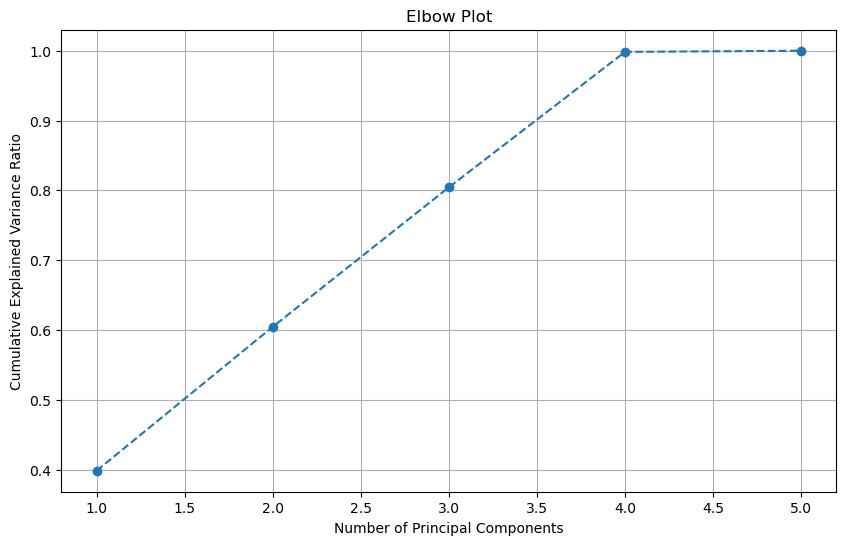

In [49]:

# Plot the cumulative explained variance ratio
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance) + 1), explained_variance.cumsum(), marker='o', linestyle='--')
plt.title('Elbow Plot')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.grid(True)
plt.show()

<p>As we can see in the scree plot above, we find that the variance explained continues to rise rapidly for the first few components. However, once we have reached 4 components, there is very little change. Therefore, the ideal number of principal components to use for this analysis would be 4. This is less than ideal, as this only reduces the number of dimensions considered by 1 (we used 5 variables to create these principal components). Even so, this is an improvement that could lead to a better model.</p>
<h5>Variance of each principal component</h5>
Now that we set the number of components to 4, we can identify the variance of each component. 

In [50]:
final_pca = PCA(n_components=4, random_state=500)
final_pca.fit(pca_data_scaled)
X_final_pca = final_pca.transform(pca_data_scaled)
X_final_pca_loadings = pd.DataFrame(final_pca.components_.T, columns=["PC1", "PC2", "PC3", "PC4"], index = pca_columns)
explained_variance = final_pca.explained_variance_ratio_
print('Cumulative variance ratio:', explained_variance)

Cumulative variance ratio: [0.39825067 0.20621809 0.19983394 0.19402497]


<p>Above, we see the variance accounted for with each principal component, starting with 39.8% with the first principal component, and ending with 19.4% with the final principal component</p>
<h5>Total Variance</h5>
<p>We have already determined the variance that each component takes into account, but a similarly important metric is the overall variance taken into account by the variances cumulatively.</p>

In [51]:
print(f"These 7 principal components cumilatively explain {round(sum(explained_variance * 100), 2)}% of variance")

These 7 principal components cumilatively explain 99.83% of variance


<h5>Summary</h5>
<p>With the PCA completed, we can now analyze the effectiveness of the PCA. We can see that principal components are capable of explaining 99.83% of variance, which is remarkably high. However, this only reduces the number of dimensions by 1, as there are 4 principal components and 5 dimensions being input. Ideally, we would have been able to reduce the number of dimensions by a greater margin. To summarize, these results would be sufficient for use in further analysis, and can be considered very reliable. However, the benefits are also limited, only reducing the dimensions by 1. As such, the improvement is present, but not as pronounced as I would like, and could potentially be improved if the dataset were to contain more continuous variables.</p>

<h4 id="E">Web Sources</h4>
<p><a href="https://app.datacamp.com/learn/custom-tracks/custom-data-mining-ii">Data Camp Tutorial Covering PCA</a></p>
<h4 id="F">Sources</h4>
<p><a href="https://www.geeksforgeeks.org/reduce-data-dimentionality-using-pca-python/">GeeksForGeeks information that covers the conceptual benefits of PCA</a></p>